# PSU DS 200  Fall 2024
# Optional Lab 11 Stratified K-fold CV for DT Hyperparameter Tuning

## Instructor: John Yen

## LAs: Lauren Miller, Aaron Almeida, Amiera Masheetah Binti Irwan Rizalman, and Sharifah Rodziah Hanim BintiSyed Alwi

## Problems:
- Problem 1 : 1 point
- Problem 2 : 1 point
- Problem 3 : 1 point
- Problem 4 : 1 point
- Problem 5: 1 point

## Total: 5 points
## Due: Nov 13, 11:59 pm

## Early Submission Bonus: 10 points, before midnight November 10th


In [162]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import numpy as np

# from sklearn.externals import joblib

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [163]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [164]:
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
!ls /content/drive/My\ Drive/DS200F24/

Ben-NE-9-10-2015-pass.csv  BreatCancerFinal.csv		sentiment_classifier_P4_vxu.pdf
Ben_pass_vx_10_22_Ex3	   ChatGPTtweets.csv
Ben_pass_vx_10_22_Ex3.pdf  sentiment_classifier_P4_vxu


In [167]:
path= "/content/drive/My Drive/DS200F24/BreatCancerFinal.csv"
BC_table = Table.read_table(path)
BC_table.show(5)

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,classification
17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,1
19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,1
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,1
20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,1


In [168]:
BC_feature_names= BC_table.labels
print(BC_feature_names)
BC_table.num_columns

('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'classification')


31

In [169]:
# Because the last column is 'classification', which is NOT a feture, but the model's prediction variable, therefore we need to extract the first 30 columns as the list of feature names.
BC_feature_names = BC_feature_names[0:30]
print(BC_feature_names)

('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst')


In [170]:
BC_features = BC_table.values[:, 0:30]
print(BC_features)

[[17.99 10.38 122.8 ..., 0.2654 0.4601 0.1189]
 [20.57 17.77 132.9 ..., 0.186 0.275 0.08902]
 [19.69 21.25 130.0 ..., 0.243 0.3613 0.0875799999999999]
 ..., 
 [14.05 27.15 91.38 ..., 0.1048 0.225 0.08321]
 [11.2 29.37 70.67 ..., 0.0 0.1566 0.05905]
 [7.76 24.54 47.92 ..., 0.0 0.2871 0.07039]]


In [171]:
BC_classification = BC_table.values[:, 30]
print(BC_classification)
type(BC_classification)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

numpy.ndarray

# Convert the labels to ``float`` type, which is expected by ``sklearn``

In [172]:
BC_labels = BC_classification.astype(float)
print(BC_labels)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [173]:
# Print the total number of labelled data. This way, we can double check the number of training and testing in each fold is correct.
print('Size of Labelled Data: ', len(BC_classification))

Size of Labelled Data:  569


# Stratified KFold Cross Validation
StratifiedKFold is a function in sklearn under the submodule model_selection.
### Notice: In the beginning of this notebook, we import StratifiedKFold using the following python code:
```
    from sklearn.model_selection import StratifiedKFold
```
### The ``n_splits`` parameter of StratifiedKFold indicates how many folds to use.  For example, n_splits=5 means Stratified 5-fold cross validation.


In [174]:
# Use Stratified Kfold Cross Validation so that
#   each fold contains the same ratio of positive/negative instances
k = 5
skf = StratifiedKFold(n_splits= k , random_state=11, shuffle= True)

## Using Numpy Array to record model performance (f1) for each fold, and each hyper-parameter value.

In [175]:
### Set the range of max_depth for finding the best max_depth for this problem
low_max_depth = 2
high_max_depth = 12
training_performance_table = np.empty( [high_max_depth+1, k+1] )
testing_performance_table = np.empty( [high_max_depth+1, k+1] )

# Problem 1 (1 point)
Complete the following code to specify
- The parameters for clf.fit (the first parameter is the training input features, and the second parameter is the labels of the training data)

- The hyper-parameter value for ``max_depth``, which changes in the loop ``for depth in ..``.

Execute the code, which iterates over (1) different folds of training-testing split generated from stratified k-fold earlier, and (2) different max_depth choices.



In [176]:
X = BC_features
y = BC_labels
fold = 0
for train_index, test_index in skf.split(X,y):
  fold = fold + 1
  X_train = X[train_index]
  y_train = y[train_index]
  X_test = X[test_index]
  y_test = y[test_index]
  for depth in range(low_max_depth, high_max_depth + 1):
        clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=depth,
                                  min_samples_leaf =2)
        clf.fit(X_train, y_train)
        predicted_training_y = clf.predict(X_train)
        train_f1= metrics.f1_score(y_train, predicted_training_y)
        training_performance_table[depth, fold]=train_f1
        predicted_testing_y = clf.predict(X_test)
        test_f1 = metrics.f1_score(y_test, predicted_testing_y)
        testing_performance_table[depth, fold]= test_f1
        # end of the inner for loop
# end of the outer for loop

# We can extract model performance for a specific hyper-parameter across all folds from ``f1_training_array`` using the index ``[5, 1:k+1:1]``

In [177]:
f1_training_array=training_performance_table[5, 1:k+1:1]
print(f1_training_array)

[ 0.98525074  0.98203593  0.99706745  0.97947214  0.98224852]


In [178]:
f1_testing_array = testing_performance_table[5, 1:k+1:1]
print(f1_testing_array)

[ 0.89411765  0.93181818  0.89156627  0.91954023  0.9047619 ]


In [179]:
f1_testing_d6_array = testing_performance_table[6, 1:k+1:1]
print(f1_testing_d6_array)

[ 0.89411765  0.91954023  0.89156627  0.9047619   0.9047619 ]


### Calculate Average, Minimum, and Maximum f1 score across folds
The first dimension of training_performance_table refers to a specific max_depth value.
The second dimension of training_performance_table refers to the number of a fold (in a Stratified k-fold).

For example, the code below returns an array of f1_score for all k folds for max_depth set to 5.

#### Numpy offers a convenient way to calculate the average, the minimum, and the maximum value of a given array:
    np.average returns the average of a given array
    np.amin returns the minimum value of a given array
    np.amax regturns the maximum value of a given array

In [180]:
np.average(f1_testing_array)

0.90836084571684172

In [181]:
np.std(f1_testing_array)

0.015317338350978248

In [182]:
np.average(f1_testing_d6_array)

0.90294959030558641

In [183]:
np.std(f1_testing_d6_array)

0.009893448379492676

In [184]:
np.amin(training_performance_table[7, 1:k+1:1])

0.98809523809523814

In [185]:
np.amax(training_performance_table[7, 1:k+1:1])

0.99706744868035191

### We want to calculate the average and minimum f1 across all folds for each max_depth so that we can compare them.

# Problem 2 (1 point)
 We want to compare the average and minimum of f1 scores (across all k folds) for each max_depth for training data and testing data. Complete the following code to compute the average, minimum, and maximum using `np.average`m `np.amin`, and `np.amax`. We store them in the cv_training_f1_summary table with different value for the second coloumn:
 * 0: average
 * 1: minimum
 * 2: maximum




In [186]:
cv_training_f1_summary = np.empty( [high_max_depth+1, 3])
cv_testing_f1_summary = np.empty( [high_max_depth+1, 3])
first_fold = 1
last_fold = k
for depth in range(low_max_depth, high_max_depth+1):
    train_f1_array = training_performance_table[depth, first_fold:last_fold+1:1]
    cv_training_f1_summary[depth, 0] = np.average(train_f1_array)
    cv_training_f1_summary[depth, 1] = np.amin(train_f1_array)
    cv_training_f1_summary[depth, 2] = np.amax(train_f1_array)
    test_f1_array = testing_performance_table[depth, first_fold:last_fold+1:1]
    cv_testing_f1_summary[depth, 0] = np.average(test_f1_array)
    cv_testing_f1_summary[depth, 1] = np.amin(test_f1_array)
    cv_testing_f1_summary[depth, 2] = np.amax(test_f1_array)

# Problem 3 (1 point)
 We want to compare the average of f1 scores (across all k folds) for each max_depth for training data and testing data. Complete the following code to compute the average and minimum using `np.average` and `np.amin`.

In [187]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [188]:
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning )

In [189]:
depth=np.linspace(low_max_depth, high_max_depth, high_max_depth-low_max_depth+1)
print(depth)

[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]


In [190]:
avg_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 1]
avg_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 1]
print(avg_f1_training)
print(avg_f1_testing)

[ 0.91415844  0.96253202  0.97310729  0.98521496  0.99288514  0.99348568
  0.99348568  0.99348568  0.99348568  0.99348568  0.99348568]
[ 0.8916274   0.92043314  0.9068553   0.90836085  0.90294959  0.90570821
  0.90570821  0.90570821  0.90570821  0.90570821  0.90570821]


# Problem 4 (1 point)
Complete the following code for plotting average f1 training (across k folds) and
average f1 testing. Make sure you enter the correct variable corresponding to the correct lable.

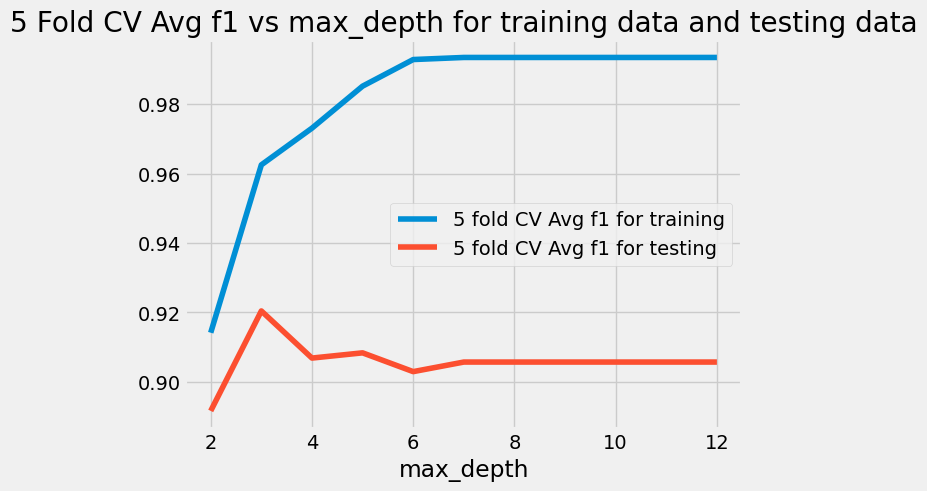

In [191]:
training_avg_label= str(k) + " fold CV Avg f1 for training"
testing_avg_label = str(k) + " fold CV Avg f1 for testing"
plt.plot(depth, avg_f1_training, label= training_avg_label)
plt.plot(depth, avg_f1_testing, label = testing_avg_label)
plt.xlabel('max_depth')
title= str(k) + ' Fold CV Avg f1 vs max_depth for training data and testing data'
plt.title(title)
plt.legend()
plt.show()

# Problem 5 (1 point)
- (a) What is your choice of the best hyper-parameter for ``max_depth``? (0.5 point)
- (b) If you had used the performance of training data, what hyper-parameteter for ``max_depth`` would you have chosen?  What problem will this lead to? Explain your answer by referring to the figure above. (0.5 point)

# Answer to Problem 5:
- (a) The best hyper-parameter would be max_depth = 5. This hyper-parameter has a good f1 score for the training and testing data while keeping the depth relatively low.
- (b) Based off of training data performance, I probably would have used max_depth = 7 or higher. This high amount of depth would have resulted in overfitting as the model would become too specialized for the training data.